## Data Set Inspection

### Counts
Will get the counts of average length of documents (word count/number of tokens), average length of each token (character count).

In [10]:
# import the necessary libraries and store file paths
import pandas as pd

dataset_stats_file = './checkpoint/results/dataset_stats.csv'
model_results_file = './checkpoint/results/model_results.csv'

In [11]:
dataset_stats_df = pd.read_csv(dataset_stats_file, encoding='utf-8', engine='python')
model_results_df = pd.read_csv(model_results_file, encoding='utf-8', engine='python')

In [12]:
dataset_stats_df.head()

,avg_raw_token_len,avg_enc_token_len,avg_word_len,num_samples,tokenization_time,dataset
0,36.505897,44.628514,4.376403,68506,2.506581,training
1,38.574781,46.336401,4.547284,2173,0.068070,validation
2,30.829268,37.460545,4.507213,697,0.019521,testing


In [13]:
model_results_df.head()

,Model,N,K,P,R,F1,sent_per_s
0,PACRF,5,5,0.602,0.662,0.630,680
1,PACRF,5,10,0.537,0.746,0.623,680
2,ProtoDot,5,5,0.457,0.744,0.566,1600
3,ProtoDot,5,10,0.502,0.798,0.616,1600


### Import Plotting Libraries

In [14]:
import seaborn as sns

### Plot Data Set Statistics

In [15]:
len_df = dataset_stats_df[['dataset', 'avg_raw_token_len', 'avg_enc_token_len', 'avg_word_len']]
len_df.reset_index(drop=True)
timing_df = dataset_stats_df[['dataset', 'tokenization_time']]
timing_df.reset_index(drop=True)
samples_df = dataset_stats_df[['dataset', 'num_samples']]
samples_df.reset_index(drop=True)

,dataset,num_samples
0,training,68506
1,validation,2173
2,testing,697


In [16]:
len_df

,dataset,avg_raw_token_len,avg_enc_token_len,avg_word_len
0,training,36.505897,44.628514,4.376403
1,validation,38.574781,46.336401,4.547284
2,testing,30.829268,37.460545,4.507213


In [17]:
timing_df

,dataset,tokenization_time
0,training,2.506581
1,validation,0.068070
2,testing,0.019521


In [18]:
samples_df

,dataset,num_samples
0,training,68506
1,validation,2173
2,testing,697


In [19]:
len_melted = len_df.melt(id_vars=['dataset'])
len_melted.replace('avg_raw_token_len', 'Raw Token', inplace=True)
len_melted.replace('avg_enc_token_len', 'Encoded Token', inplace=True)
len_melted.replace('avg_word_len', 'Word (Characters)', inplace=True)

In [20]:
len_melted

,dataset,variable,value
0,training,Raw Token,36.505897
1,validation,Raw Token,38.574781
2,testing,Raw Token,30.829268
3,training,Encoded Token,44.628514
4,validation,Encoded Token,46.336401
5,testing,Encoded Token,37.460545
6,training,Word (Characters),4.376403
7,validation,Word (Characters),4.547284
8,testing,Word (Characters),4.507213


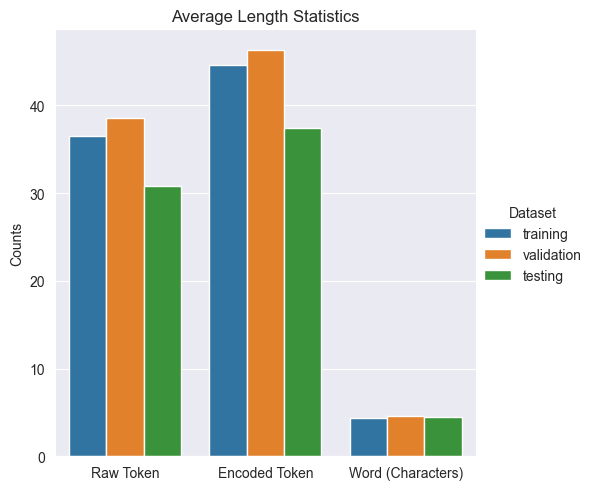

In [21]:
g = sns.catplot(data=len_melted, kind='bar', x='variable', y='value', hue='dataset')
g.set_axis_labels("", "Counts")
g.legend.set_title("Dataset")
g.set(title="Average Length Statistics")

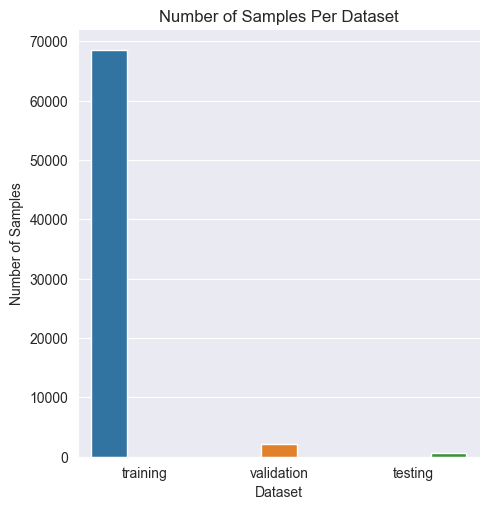

In [22]:
g = sns.catplot(data=samples_df, kind='bar', x='dataset', y='num_samples', hue='dataset')
g.set_axis_labels("Dataset", "Number of Samples")
g.set(title='Number of Samples Per Dataset')

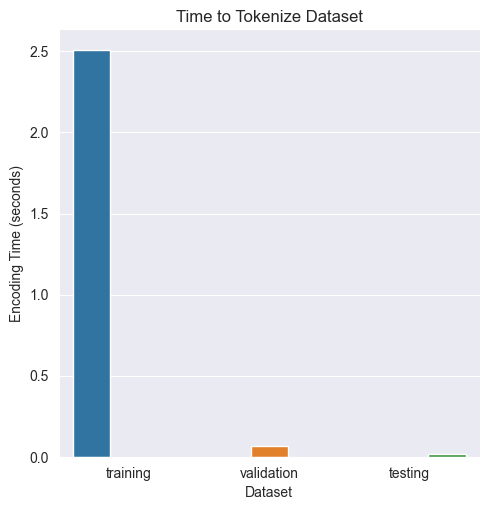

In [24]:
g = sns.catplot(data=timing_df, kind='bar', x='dataset', y='tokenization_time', hue='dataset')
g.set_axis_labels('Dataset', 'Encoding Time (seconds)')
g.set(title='Time to Tokenize Dataset')

## Plot Model Statistics

In [324]:
model_results_df

,Model,N,K,P,R,F1,sent_per_s
0,PACRF,5,5,0.602,0.662,0.630,680
1,PACRF,5,10,0.537,0.746,0.623,680
2,ProtoDot,5,5,0.457,0.744,0.566,1600
3,ProtoDot,5,10,0.502,0.798,0.616,1600


In [325]:
p_df = model_results_df[['Model', 'N', 'K', 'P']].copy()
r_df = model_results_df[['Model', 'N', 'K', 'P']].copy()
f1_df = model_results_df[['Model', 'N', 'K', 'F1']].copy()
sps_df = model_results_df[['Model', 'sent_per_s']].copy()

metrics_df = model_results_df[['Model', 'N', 'K', 'P', 'R', 'F1']].copy()
speed_df = model_results_df[['Model', 'sent_per_s']].copy()

In [326]:
def nway_kshot(row):
    if row['N'] == 5 and row['K'] == 5:
        return '5-Way 5-Shot'
    elif row['N'] == 5 and row['K'] == 10:
        return '5-Way 10-Shot'
    else:
        return 'n/a'

In [327]:
metrics_df['N-Way K-Shot'] = metrics_df.apply(nway_kshot, axis=1)

In [328]:
metrics_df.drop(columns=['N', 'K'], inplace=True)
metrics_df

,Model,P,R,F1,N-Way K-Shot
0,PACRF,0.602,0.662,0.630,5-Way 5-Shot
1,PACRF,0.537,0.746,0.623,5-Way 10-Shot
2,ProtoDot,0.457,0.744,0.566,5-Way 5-Shot
3,ProtoDot,0.502,0.798,0.616,5-Way 10-Shot


In [329]:
speed_df.drop_duplicates(inplace=True)
speed_df

,Model,sent_per_s
0,PACRF,680
2,ProtoDot,1600


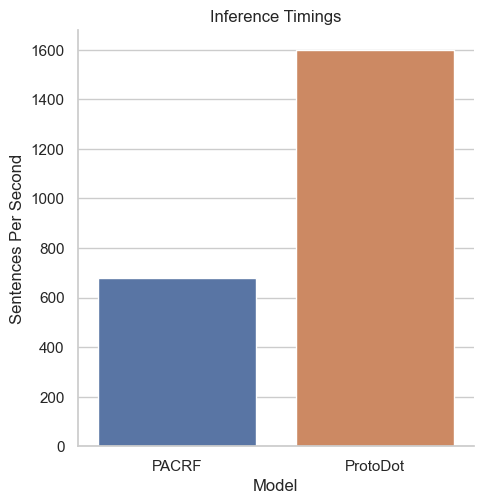

In [330]:
g = sns.catplot(data=speed_df, kind='bar', x='Model', y='sent_per_s')
g.set_axis_labels('Model', 'Sentences Per Second')
g.set(title='Inference Timings')

In [331]:
metrics_melt = metrics_df.melt(id_vars=['Model', 'N-Way K-Shot'])
metrics_melt

,Model,N-Way K-Shot,variable,value
0,PACRF,5-Way 5-Shot,P,0.602
1,PACRF,5-Way 10-Shot,P,0.537
2,ProtoDot,5-Way 5-Shot,P,0.457
3,ProtoDot,5-Way 10-Shot,P,0.502
4,PACRF,5-Way 5-Shot,R,0.662
5,PACRF,5-Way 10-Shot,R,0.746
6,ProtoDot,5-Way 5-Shot,R,0.744
7,ProtoDot,5-Way 10-Shot,R,0.798
8,PACRF,5-Way 5-Shot,F1,0.630
9,PACRF,5-Way 10-Shot,F1,0.623


In [332]:
metrics_melt.query("variable == 'P'")

,Model,N-Way K-Shot,variable,value
0,PACRF,5-Way 5-Shot,P,0.602
1,PACRF,5-Way 10-Shot,P,0.537
2,ProtoDot,5-Way 5-Shot,P,0.457
3,ProtoDot,5-Way 10-Shot,P,0.502


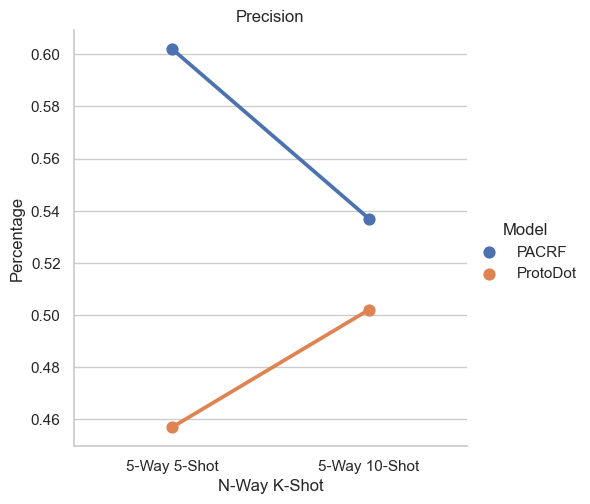

In [333]:
g = sns.catplot(data=metrics_melt.query("variable == 'P'"), kind='point',
              x='N-Way K-Shot', y='value', hue='Model')
g.set(title='Precision')
g.set_axis_labels('N-Way K-Shot', 'Percentage')

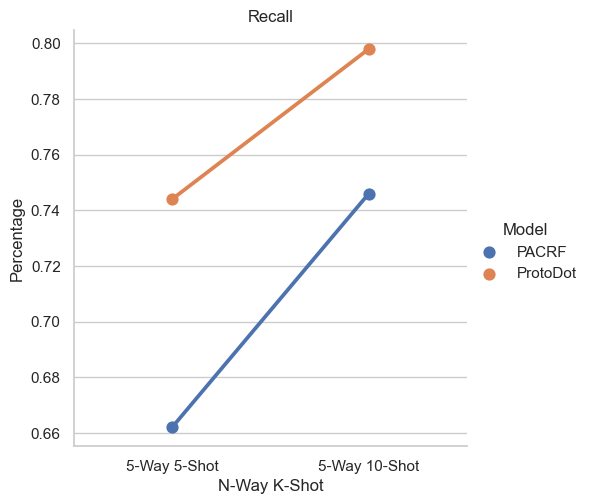

In [334]:
g = sns.catplot(data=metrics_melt.query("variable == 'R'"), kind='point',
                x='N-Way K-Shot', y='value', hue='Model')
g.set(title='Recall')
g.set_axis_labels('N-Way K-Shot', 'Percentage')

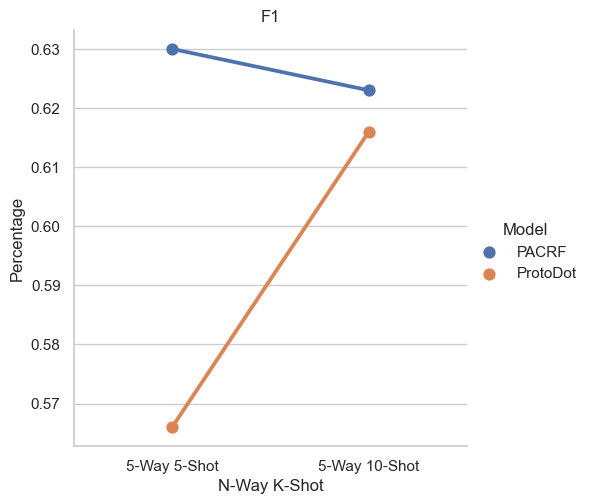

In [335]:
g = sns.catplot(data=metrics_melt.query("variable == 'F1'"), kind='point',
                x='N-Way K-Shot', y='value', hue='Model')
g.set(title='F1')
g.set_axis_labels('N-Way K-Shot', 'Percentage')

### Visualize Dataset Clusters
Will be using Plotly Express to generate the 3D clustered data.
This will not work in a Jupyter notebook since the graph opens itself in a browser.
The plot_data_clusters.py script will plot both the tokenization clusters and embedding clusters.